In [5]:
include("Create_Sample.jl")
include("Split.jl")
include("GA.jl")
include("Initial.jl")
include("Mutation.jl")
include("Crossover.jl")
include("Neighborhood.jl")
include("Neighborhood_intra.jl")
include("costs.jl")
include("Draw.jl")
include("Escape.jl")
include("cross_escape.jl")

N_shift1_extensive (generic function with 1 method)

In [11]:
instances = [:eil51] #, :berlin52, :eil76, :rat99]
LKH3 = [[222.7, 159.6, 124.0, 112.1],[4110.2, 3184.2, 2440.9, 2440.9], [280.9, 196.7, 143.4, 128.2],[690.8, 523.3, 467.0,442.5]]
Ms = [7] #, 3, 5, 7]

best_v = Float64[]
Avg_v = Float64[]
worst_v = Float64[]

count = 0
best_ = 0.0
Avg_ = 0.0
worst_ = 0.0
time_ = 0.0
P = Chromosome[]
best_chrm = Chromosome(Int[], 0.0, 0.0, Tour[])
worst_chrm = Chromosome(Int[], 0.0, 0.0, Tour[])
crossover_functions = [5,7,8]
demands = Int[]
W = 150
for (i,instance) in enumerate(instances)
    for (j,K) in enumerate(Ms)
        count += 1
        T = Read_TSPLIB_instance(instance, 1)
        n = size(T)[1]-2
        demands = ones(Int, n)
        W = 150
        h = 0.3
        popsize = (20,40)
        k_tournament = 2
        num_iter = 2000
        Mutation_Chance = 0.0
        
        num_runs = 10
        num_nei = 2
        avg = 0.0
        best = Inf
        worst = 0.0
        t1 = time() 
        P = Chromosome[]
        for i=1:num_runs
            P, roullet = Perform_Genetic_Algorithm(T, demands,K, W, h, popsize, 
                k_tournament, num_iter, Mutation_Chance, num_nei, crossover_functions);
#             roullet_ = roullet_ + roullet
            avg += P[1].fitness
            if P[1].fitness < best
                best = P[1].fitness
                best_chrm = P[1]
            end
            if P[1].fitness > worst
                worst = P[1].fitness
                worst_chrm = P[1]
            end
            if P[1].fitness < 223
                break
            end
        end
        t2 = time()
        println("Results for ", instance, " ,m=", K)
        println("Best: ", round(best, digits = 1), "  Average: ", round(avg/num_runs, digits = 1), 
            "  Worst: ", round(worst, digits = 1), " , run time= ", round((t2-t1)/num_runs, digits=0))
        best_ += 100*(best-LKH3[i][j])/LKH3[i][j]
        worst_ += 100*(worst-LKH3[i][j])/LKH3[i][j]
        Avg_ += 100*(avg/num_runs-LKH3[i][j])/LKH3[i][j]
        time_ += t2-t1
    end
end
push!(best_v, best_/count)
push!(worst_v, worst_/count)
push!(Avg_v, Avg_/count)
println("Results:  Best: ", round(best_/count, digits=1), "  Average: ", round(Avg_/count, digits=1), "  Worst: ", round(worst_/count, digits=1), "   run time: ", round(time_/count, digits=1))
K = Ms[1]

The best objective achieved in 3594 generations is: 508.70186498820664 and it took 1.053999900817871 seconds.
The best objective achieved in 3865 generations is: 508.70186498820664 and it took 1.130000114440918 seconds.
The best objective achieved in 2235 generations is: 508.7018649882066 and it took 0.7039999961853027 seconds.
The best objective achieved in 4017 generations is: 508.70186498820664 and it took 1.1659998893737793 seconds.
The best objective achieved in 2057 generations is: 517.1905408917917 and it took 0.6619999408721924 seconds.
The best objective achieved in 2202 generations is: 517.1905408917917 and it took 0.693000078201294 seconds.
The best objective achieved in 2368 generations is: 517.1905408917917 and it took 0.7369999885559082 seconds.
The best objective achieved in 2604 generations is: 517.1905408917917 and it took 0.8040001392364502 seconds.
The best objective achieved in 2379 generations is: 517.1905408917917 and it took 0.7549998760223389 seconds.
The best o

7

Tour 1:
7 25 30 27 2 35 34 19 28 20 15 49 33 29 8 48 9 38 32 44 14 43 41 18 39 
40 12 24 13 23 42 6 22 5 
cost=322.0239918304918
Tour 2:
50 45 11 46 17 3 16 36 4 37 10 
cost=94.76842946937842
Tour 3:
31 
cost=12.165525060596439
Tour 4:
26 
cost=16.1245154965971
Tour 5:
47 
cost=24.73863375370595
Tour 6:
1 
cost=24.73863375370596
Tour 7:
21 
cost=14.142135623730951


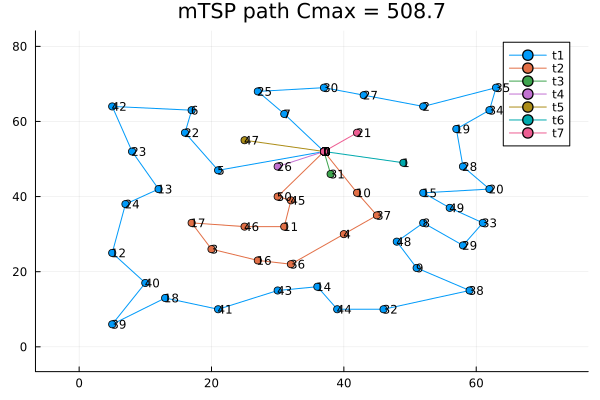

In [12]:
T = Read_TSPLIB_instance(:eil51, 1)
tsp = readTSPLIB(:eil51)
allNodes = tsp.nodes
n_nodes = size(allNodes)[1] - 1
depot = allNodes[1, :]
Customers = allNodes[2:n_nodes+1, :];
Draw_Solution(best_chrm, depot, Customers, "mTSP path", best_chrm.fitness)

Tour 1:
7 25 30 27 2 35 34 19 28 1 
cost=101.44572421445092
Tour 2:
21 
cost=14.142135623730951
Tour 3:
26 
cost=16.1245154965971
Tour 4:
50 45 11 46 17 3 16 36 4 37 10 
cost=94.76842946937842
Tour 5:
31 
cost=12.165525060596439
Tour 6:
47 
cost=24.73863375370596
Tour 7:
15 49 20 33 29 8 48 9 38 32 44 14 43 41 18 39 40 12 24 13 23 42 6 22 5 

cost=253.80557727333192


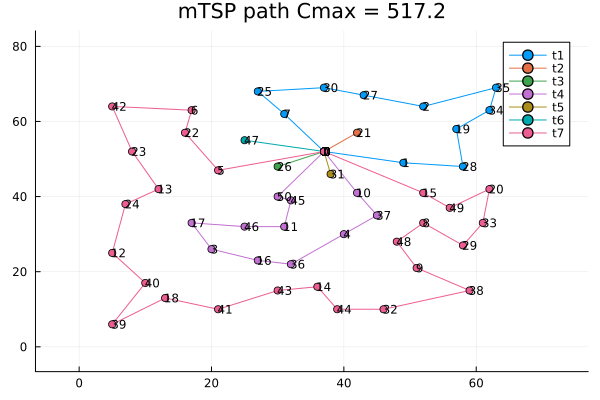

In [13]:
Draw_Solution(worst_chrm, depot, Customers, "mTSP path", worst_chrm.fitness)

In [49]:
obj, tours = SPLIT_minsum(T, 2, P[1].genes)

(435.5216820199954, Tour[Tour([21], 14.142135623730951), Tour([7, 25, 30, 27, 2, 35, 34, 19, 28, 1  …  11, 46, 17, 3, 16, 36, 4, 37, 10, 31], 421.37954639626446)])

In [16]:

dir_name = "set1"
sample_name = "mtsp51_3"
m, T = read_data(dir_name, sample_name)
n_nodes = size(T)[1]-2
tsp_tour, l = find_tsp_tour1(T[1:n_nodes+1, 1:n_nodes+1])
obj, tours = SPLIT_minsum(T, m, tsp_tour)

(447.28436628645534, Tour[Tour([21], 14.142135623730951), Tour([7, 25, 30, 27, 2, 35, 34, 19, 28, 1  …  45, 11, 46, 17, 3, 16, 36, 4, 37, 10], 420.97670560212794), Tour([31], 12.165525060596439)])

Tour 1:
21 
cost=14.142135623730951
Tour 2:
7 25 30 27 2 35 34 19 28 1 15 49 20 33 29 8 48 9 38 32 44 14 43 41 18 
39 40 12 24 13 23 42 6 22 47 5 26 50 45 11 46 17 3 16 36 4 37 10 31 
cost=421.37954639626446


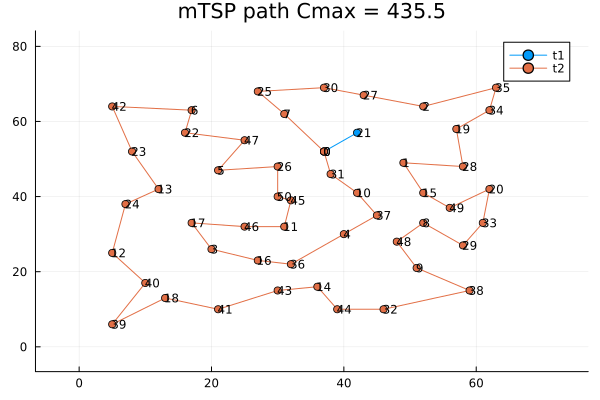

In [33]:
offspring = Chromosome(tsp_tour, obj, 0.0, tours)
Draw_Solution(offspring, depot, Customers, "mTSP path", obj)

In [15]:
function read_data(dir_name::String, sample_name::String)
    filename = joinpath(abspath(joinpath(pwd(), "..")), "data/$(dir_name)/$(sample_name).txt")
    f = open(filename, "r")
    lines = readlines(f)
    m = parse(Int,split(lines[1]," ")[3])
    n_nodes = length(lines)-2
    depot = parse.(Int, split(lines[2],"\t"))[2:3]
    customers = zeros(2, n_nodes)
    for i=1:n_nodes
        customers[:,i] = parse.(Int, split(lines[2+i],"\t"))[2:3]
    end
    T = Matrix{Float64}(undef, n_nodes + 2, n_nodes + 2)
    T[1, 1] = 0.0
    T[n_nodes+2, n_nodes+2] = 0.0
    T[1, n_nodes+2] = 0.0
    T[n_nodes+2, 1] = 0.0
    @inbounds for i in 1:n_nodes
        T[1, i+1] = euclidean(depot, customers[:, i])
        T[i+1, 1] = T[1, i+1]
        T[n_nodes+2, i+1] = T[1, i+1]
        T[i+1, n_nodes+2] = T[1, i+1]
        @inbounds for j in 1:n_nodes
            T[i+1, j+1] = euclidean(customers[:, i], customers[:, j])
            T[j+1, i+1] = T[i+1, j+1]
        end
    end

    return m, T
end

read_data (generic function with 1 method)

Tour 1:
47 5 13 23 42 22 6 25 7 30 27 2 35 34 19 28 20 33 29 8 49 15 1 21 31 
10 37 4 48 9 38 32 44 14 36 16 43 41 18 39 40 12 24 17 3 46 11 45 50 26 

cost=442.8822986646737


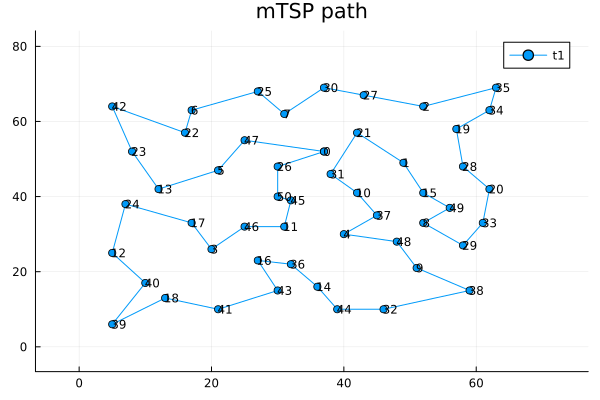

In [28]:
a = [21, 7, 25, 30, 27, 2, 35, 34, 19, 1, 28, 20, 15, 49, 33, 29, 8, 4, 36, 16, 3, 17, 46, 11, 45, 50, 31, 10, 37, 48, 9, 38, 32, 44, 14, 43, 41, 18, 39, 40, 12, 24, 13, 23, 42, 6, 22, 47, 5, 26]
b = [47, 5, 13, 23, 42, 22, 6, 25, 7, 30, 27, 2, 35, 34, 19, 28, 20, 33, 29, 8, 49, 15, 1, 21, 31, 10, 37, 4, 48, 9, 38, 32, 44, 14, 36, 16, 43, 41, 18, 39, 40, 12, 24, 17, 3, 46, 11, 45, 50, 26]

tours = [Tour(b, find_tour_length(b, T))]
c = Chromosome(b, 0.0, 0.0, tours)
Draw_Solution(c, depot, Customers)

In [26]:
find_tour_length(b, T)

442.8822986646737

Tour 1:
21 7 25 30 27 2 35 34 19 28 1 15 49 20 33 29 8 48 9 38 32 44 14 43 41 
18 39 40 12 24 13 23 42 6 22 47 5 26 50 45 11 46 17 3 16 36 4 37 10 31 

cost=428.871


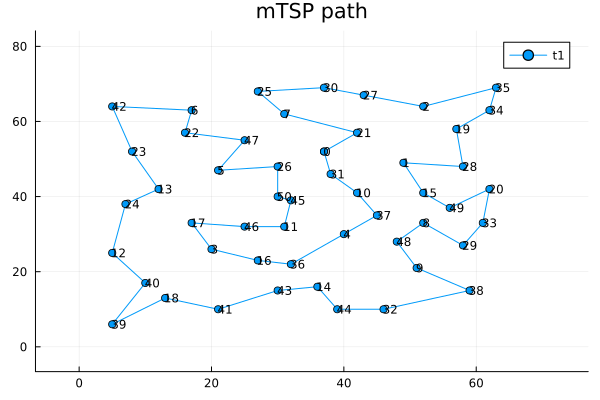

In [29]:

tsp_tour, l = find_tsp_tour1(T[1:n_nodes+1, 1:n_nodes+1])

tours = [Tour(tsp_tour, l)]
c = Chromosome(tsp_tour, 0.0, 0.0, tours)
Draw_Solution(c, depot, Customers)

Tour 1:
7 25 42 22 5 26 50 45 11 46 17 3 16 40 18 41 43 14 8 49 20 28 19 34 35 2 27 30 
cost=281.180490268878
Tour 2:
21 31 1 15 10 37 44 32 38 33 29 9 48 4 36 39 12 24 13 23 6 47 
cost=281.8890554371013


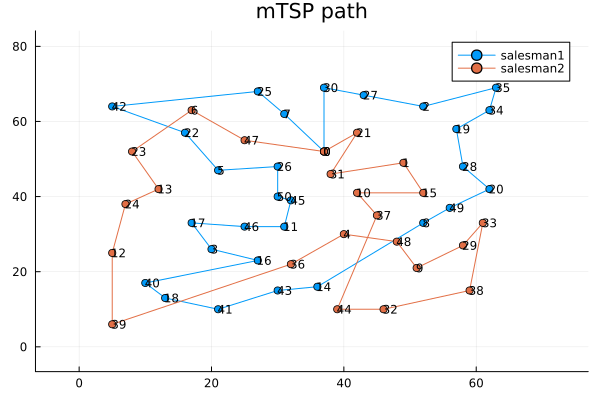

In [145]:
include("Crossover.jl")
T = Read_TSPLIB_instance(:eil51, 1)
n = size(T)[1]-2
demands = ones(Int, n)
W = 150
K = 2
p1 = deepcopy(worst_chrm)
p2 = deepcopy(best_chrm)
child = tour_crossover3(p1, p2, T, n)
obj, trips = SPLIT(T, demands, K, W, child)
offspring = Chromosome(child, obj, 0.0, trips)
Draw_Solution(offspring, depot, Customers)

Tour 1:
47 42 23 24 12 40 39 18 41 43 14 44 32 38 9 29 49 15 20 28 35 1 
cost=269.2699999426864
Tour 2:
21 19 34 2 27 30 7 25 6 22 5 13 17 3 16 36 46 11 4 48 33 8 37 10 31 45 50 26 
cost=247.3426190886282


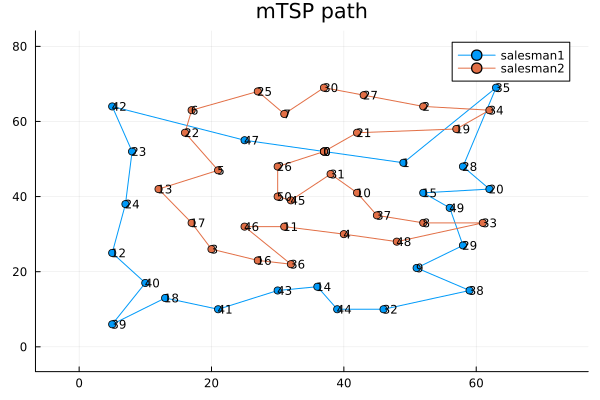

In [183]:
Draw_Solution(test_chrm, depot, Customers)

In [165]:
include("Neighborhood.jl")
demands = ones(Int, n_nodes)
W = 150
h = 1.0
Close_nodes= Find_Closeness(T, h) 
roullet = ones(Int, 25)
for i=1:10
    Improve_chromosome(test_chrm, T, Close_nodes, demands, W, n_nodes, roullet)
end

Tour 1:
47 6 42 23 24 12 40 39 18 41 43 14 44 32 38 9 29 33 49 15 20 28 1 
cost=236.66212072549598
Tour 2:
21 19 34 35 2 27 30 7 25 22 5 13 17 3 16 36 46 11 4 48 8 37 10 31 45 50 26 
cost=237.22653469995578


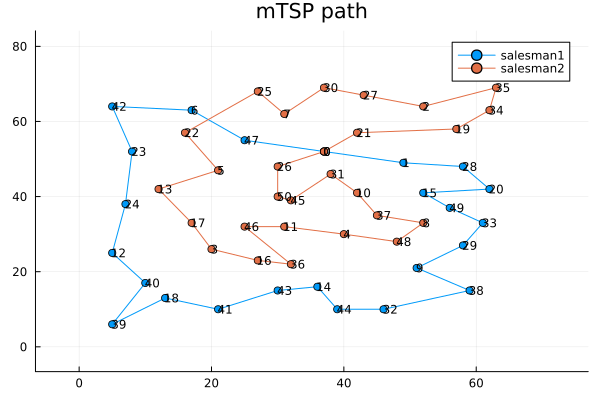

In [100]:
Draw_Solution(subs[1], depot, Customers)

In [320]:
test_chrm = deepcopy(worst_chrm_)
test_chrm = chunk_mutation_rand(test_chrm, T, 5)
println(test_chrm.fitness)
P = [test_chrm]
include("Escape.jl")
P1 = deepcopy(P)
T = Read_TSPLIB_instance(:eil51, 1)
n_nodes = size(T)[1]-2
demands = ones(Int, n_nodes)
W = 150
h = 1.0
Close_nodes= Find_Closeness(T, h) 
turn = 1
iter = 100000
max_size = 20
allowed_diff = 0.1
elite = 3
subs, fs = Escape_local_optima(P1, T, Close_nodes, demands, W, n_nodes, turn, iter, max_size, allowed_diff, elite);

249.967


In [321]:
fs

20-element Vector{Vector{Float64}}:
 [241.657, 243.7863]
 [243.6365, 245.0352]
 [244.5019, 245.0352]
 [255.8693, 257.9692]
 [262.8539, 263.3177]
 [256.6342, 263.0838]
 [255.0715, 266.7291]
 [247.1365, 256.6342]
 [243.6365, 260.9863]
 [246.1749, 265.2054]
 [256.2639, 265.7585]
 [254.6756, 263.3599]
 [266.5521, 266.9155]
 [256.6342, 264.0605]
 [244.5019, 259.2561]
 [241.657, 254.6756]
 [264.18, 265.2054]
 [245.0352, 266.4148]
 [252.4483, 266.2178]
 [260.8681, 262.551]

In [62]:
subs[2]

Chromosome([31, 26, 47, 5, 50, 45, 11, 46, 17, 3  …  43, 14, 44, 32, 38, 9, 8, 49, 15, 1], 230.84501597996152, 186.25164716336513, Tour[Tour([31, 26, 47, 5, 50, 45, 11, 46, 17, 3  …  33, 20, 28, 19, 34, 35, 2, 27, 30, 21], 227.98908518967033), Tour([7, 25, 6, 22, 42, 23, 13, 24, 12, 40  …  43, 14, 44, 32, 38, 9, 8, 49, 15, 1], 230.84501597996152)])

In [108]:
function find_tour_length(tt::Vector{Int}, T::Matrix{Float64})
    t = copy(tt)
    pushfirst!(t, 0)
    push!(t, 0)
    z = 0.0
    for i = 1:length(t)-1
        z += T[t[i]+1, t[i+1]+1]
    end
    return z
end

find_tour_length (generic function with 1 method)

In [101]:
a

4-element Vector{Int64}:
 1
 2
 3
 5

In [103]:
vcat(a, a[2:3])

6-element Vector{Int64}:
 1
 2
 3
 5
 2
 3

In [147]:
sortperm(b)

25-element Vector{Int64}:
 20
 19
 18
 21
 14
 15
 13
 24
 23
 25
 22
  4
 17
 16
 10
  2
  8
  7
 11
 12
  3
  6
  5
  9
  1

In [185]:
best_chrm_ = deepcopy(best_chrm)
worst_chrm_ = deepcopy(worst_chrm)

Chromosome([47, 22, 42, 23, 24, 12, 40, 39, 18, 41  …  11, 4, 48, 8, 37, 10, 31, 45, 50, 26], 238.16260801632237, 202.13648895472298, Tour[Tour([47, 22, 42, 23, 24, 12, 40, 39, 18, 41  …  32, 38, 9, 29, 33, 49, 15, 20, 28, 1], 235.5647669154171), Tour([21, 19, 34, 35, 2, 27, 30, 7, 25, 6  …  11, 4, 48, 8, 37, 10, 31, 45, 50, 26], 238.16260801632237)])

In [229]:
new_chrm

Chromosome([21, 19, 34, 35, 2, 27, 30, 7, 25, 6  …  46, 36, 16, 3, 17, 13, 5, 20, 28, 1], 305.18816929080623, 0.0, Tour[Tour([21, 19, 34, 35, 2, 27, 30, 7, 25, 6  …  43, 14, 44, 32, 38, 9, 29, 33, 49, 15], 305.18816929080623), Tour([26, 50, 45, 31, 10, 37, 8, 48, 4, 11, 46, 36, 16, 3, 17, 13, 5, 20, 28, 1], 200.84612723333848)])

In [322]:
chrm= deepcopy(worst_chrm_)
include("Mutation.jl")
new_chrm = chunk_mutation_rand(chrm, T, 5)

Chromosome([50, 26, 47, 7, 27, 30, 25, 6, 22, 42  …  9, 29, 33, 49, 15, 19, 34, 35, 2, 21], 282.607, 0.0, Tour[Tour([50, 26, 47, 7, 27, 30, 25, 6, 22, 42, 23, 24, 43, 14, 44, 32, 38, 20, 28, 1], 247.842), Tour([31, 10, 45, 5, 13, 17, 12, 40, 39, 18  …  9, 29, 33, 49, 15, 19, 34, 35, 2, 21], 282.607)])

In [323]:
chrm

Chromosome([47, 22, 42, 23, 24, 12, 40, 39, 18, 41  …  11, 4, 48, 8, 37, 10, 31, 45, 50, 26], 238.16260801632237, 202.13648895472298, Tour[Tour([47, 22, 42, 23, 24, 12, 40, 39, 18, 41  …  32, 38, 9, 29, 33, 49, 15, 20, 28, 1], 235.5647669154171), Tour([21, 19, 34, 35, 2, 27, 30, 7, 25, 6  …  11, 4, 48, 8, 37, 10, 31, 45, 50, 26], 238.16260801632237)])

In [324]:
new_chrm

Chromosome([50, 26, 47, 7, 27, 30, 25, 6, 22, 42  …  9, 29, 33, 49, 15, 19, 34, 35, 2, 21], 282.607, 0.0, Tour[Tour([50, 26, 47, 7, 27, 30, 25, 6, 22, 42, 23, 24, 43, 14, 44, 32, 38, 20, 28, 1], 247.842), Tour([31, 10, 45, 5, 13, 17, 12, 40, 39, 18  …  9, 29, 33, 49, 15, 19, 34, 35, 2, 21], 282.607)])

Tour 1:
47 22 42 23 24 12 40 39 18 41 43 14 44 32 38 9 29 33 49 15 20 28 1 
cost=235.5647669154171
Tour 2:
21 19 34 35 2 27 30 7 25 6 5 13 17 3 16 36 46 11 4 48 8 37 10 31 45 50 26 
cost=238.16260801632237


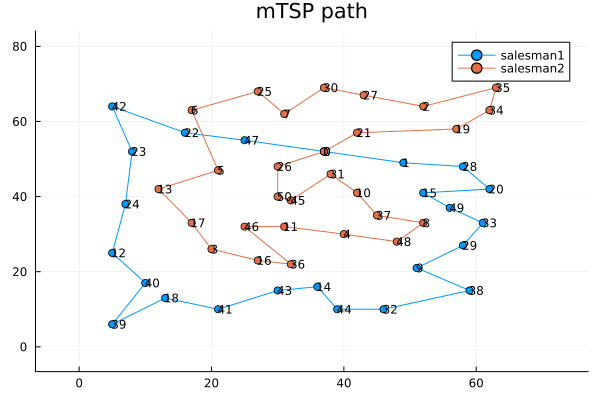

In [309]:
Draw_Solution(worst_chrm_, depot, Customers)

Tour 1:
27 30 25 7 47 22 6 42 23 24 12 40 39 18 41 9 29 33 49 15 8 37 10 31 45 50 26 
cost=272.405
Tour 2:
21 2 35 34 19 1 28 20 48 38 32 44 14 43 16 36 4 11 46 3 17 13 5 
cost=236.328


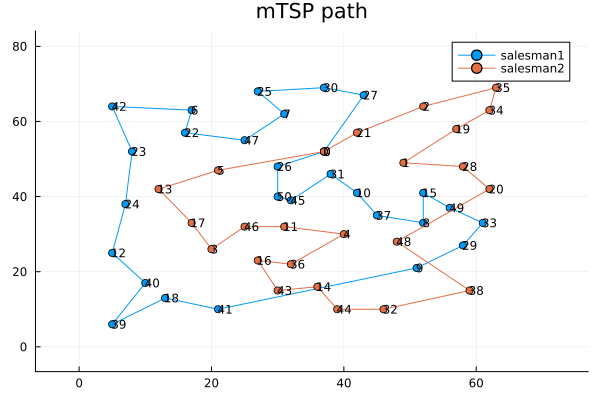

In [310]:
Draw_Solution(new_chrm, depot, Customers)

In [367]:
chrm2.tours

2-element Vector{Tour}:
 Tour([7, 25, 30, 27, 2, 35, 34, 19, 28, 20  …  41, 43, 14, 9, 48, 8, 49, 15, 1, 21], 237.73330086132793)
 Tour([31, 10, 37, 4, 45, 50, 46, 11, 36, 16  …  12, 24, 13, 23, 42, 6, 22, 47, 5, 26], 234.55317208553296)

In [379]:

chrm = deepcopy(chrm2)

Chromosome([7, 25, 30, 27, 2, 35, 34, 19, 28, 20  …  12, 24, 13, 23, 42, 6, 22, 47, 5, 26], 237.73330086132793, 202.4486155112199, Tour[Tour([7, 25, 30, 27, 2, 35, 34, 19, 28, 20  …  41, 43, 14, 9, 48, 8, 49, 15, 1, 21], 237.73330086132793), Tour([31, 10, 37, 4, 45, 50, 46, 11, 36, 16  …  12, 24, 13, 23, 42, 6, 22, 47, 5, 26], 234.55317208553296)])

In [380]:
# for i = 1:100 
#     chrm = deepcopy(chrm2)
#     chrm = prob_mutation(chrm, T, n_nodes, 0.8)
#     println(length(chrm.genes))
# end

In [395]:
chrm = prob_mutation(chrm, T, n_nodes, 0.8)

Chromosome([7, 30, 27, 2, 35, 34, 19, 28, 20, 33  …  18, 39, 24, 13, 23, 42, 6, 25, 22, 5], 321.9333696178741, 202.4486155112199, Tour[Tour([7, 30, 27, 2, 35, 34, 19, 28, 20, 33  …  4, 9, 48, 8, 49, 15, 1, 10, 26, 47], 321.9333696178741), Tour([21, 31, 50, 45, 37, 29, 32, 14, 46, 40, 18, 39, 24, 13, 23, 42, 6, 25, 22, 5], 276.93492462140046)])

In [353]:
for tour in chrm.tours
    println(find_tour_length(tour.Sequence, T))
end

290.5852705001835
327.9968251784587


Tour 1:
7 25 30 27 2 35 34 19 28 20 33 29 38 32 44 41 43 14 9 48 8 49 15 1 21 
cost=237.73330086132793
Tour 2:
31 10 37 4 45 50 46 11 36 16 3 17 40 18 39 12 24 13 23 42 6 22 47 5 26 
cost=234.55317208553296


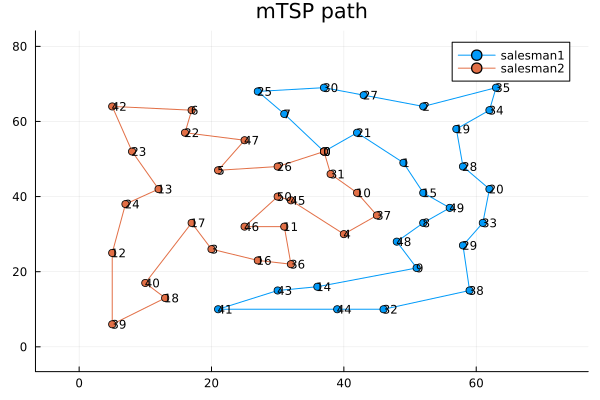

In [399]:
Draw_Solution(chrm2, depot, Customers)

In [408]:
ClosenessT[4,:]

15-element Vector{Int64}:
 37
 48
 11
 10
 36
 45
  8
 50
  9
 14
 16
 46
 31
 15
 49

Tour 1:
7 25 30 27 2 35 34 19 28 20 33 29 9 38 32 44 14 4 37 48 8 49 15 1 21 
cost=223.06096129062738
Tour 2:
31 10 45 50 11 46 17 3 16 36 43 41 18 39 40 12 24 13 23 42 6 22 47 5 26 
cost=221.7435252176443


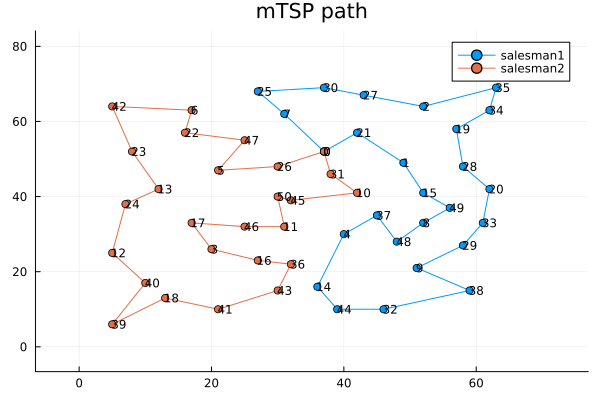

In [397]:
Draw_Solution(chrm1, depot, Customers)

In [265]:
chrm = N4(chrm, TT, Close_nodes, demands, W, n_nodes)

1212

In [25]:
function read_data_(dir_name::String, sample_name::String)
    filename = joinpath(abspath(joinpath(pwd(), "..")), "data/$(dir_name)/$(sample_name).txt")
    f = open(filename, "r")
    lines = readlines(f)
    m = parse(Int,split(lines[1]," ")[3])
    n_nodes = length(lines)-2
    depot = parse.(Int, split(lines[2],"\t"))[2:3]
    customers = zeros(2, n_nodes)
    for i=1:n_nodes
        customers[:,i] = parse.(Int, split(lines[2+i],"\t"))[2:3]
    end
    T = Matrix{Float64}(undef, n_nodes + 2, n_nodes + 2)
    T[1, 1] = 0.0
    T[n_nodes+2, n_nodes+2] = 0.0
    T[1, n_nodes+2] = 0.0
    T[n_nodes+2, 1] = 0.0
    @inbounds for i in 1:n_nodes
        T[1, i+1] = euclidean(depot, customers[:, i])
        T[i+1, 1] = T[1, i+1]
        T[n_nodes+2, i+1] = T[1, i+1]
        T[i+1, n_nodes+2] = T[1, i+1]
        @inbounds for j in 1:n_nodes
            T[i+1, j+1] = euclidean(customers[:, i], customers[:, j])
            T[j+1, i+1] = T[i+1, j+1]
        end
    end

    return m, T, depot, customers
end

read_data_ (generic function with 1 method)

(3, [0.0 12.36931687685298 … 13.892443989449804 0.0; 12.36931687685298 0.0 … 21.02379604162864 12.36931687685298; … ; 13.892443989449804 21.02379604162864 … 0.0 13.892443989449804; 0.0 12.36931687685298 … 13.892443989449804 0.0])

In [51]:
include("GA.jl")
include("Neighborhood.jl")
include("Create_Sample.jl")
using Distances
dir_name = "set1"
sample_name = "mtsp51_3"
m, T, depot, customers = read_data_(dir_name, sample_name)
n = size(T)[1]-2
demands = ones(Int, n)
W = 1000
h = 0.1
popsize = (20,40)
k_tournament = 2
num_iter = 2500
Mutation_Chance = 0.0
num_runs = 10
num_nei = 2
avg = 0.0
best = Inf
worst = 0.0
crossover_functions = [5,7,8]
best_chrm = Chromosome(Int[], 0.0, 0.0, Tour[])
worst_chrm = Chromosome(Int[], 0.0, 0.0, Tour[])

t1 = time()
for i=1:num_runs
    P, roullet = Perform_Genetic_Algorithm(T, demands,m, W, h, popsize, 
    k_tournament, num_iter, Mutation_Chance, num_nei, crossover_functions);
#             roullet_ = roullet_ + roullet
    avg += P[1].fitness
    if P[1].fitness < best
        best = P[1].fitness
        best_chrm = P[1]
    end
    if P[1].fitness > worst
        worst = P[1].fitness
        worst_chrm = P[1]
    end
end
t2 = time()
println("Results for ", sample_name, " ,m=", m)
println("Best: ", round(best, digits = 1), "  Average: ", round(avg/num_runs, digits = 1), 
    "  Worst: ", round(worst, digits = 1), " , run time= ", round((t2-t1)/num_runs, digits=0))

The best objective achieved in 2707 generations is: 445.9925666294464 and it took 1.0179998874664307 seconds.
The best objective achieved in 2500 generations is: 447.2843662864552 and it took 0.8700001239776611 seconds.
The best objective achieved in 2623 generations is: 445.9925666294464 and it took 0.9159998893737793 seconds.
The best objective achieved in 3069 generations is: 445.99256662944646 and it took 1.062999963760376 seconds.
The best objective achieved in 2500 generations is: 447.2843662864552 and it took 0.874000072479248 seconds.
The best objective achieved in 3351 generations is: 445.99256662944646 and it took 1.1510000228881836 seconds.
The best objective achieved in 2665 generations is: 445.99256662944646 and it took 0.932999849319458 seconds.
The best objective achieved in 3869 generations is: 445.99256662944646 and it took 1.261000156402588 seconds.
The best objective achieved in 3478 generations is: 445.99256662944646 and it took 1.187000036239624 seconds.
The best o

Tour 1:
21 
cost=14.142135623730951
Tour 2:
7 25 30 27 2 35 34 19 28 1 15 49 20 33 29 8 48 9 38 32 44 14 43 41 18 
39 40 12 24 13 23 42 6 22 47 5 50 45 11 46 17 3 16 36 4 37 10 31 
cost=415.7259155091184
Tour 3:
26 
cost=16.1245154965971


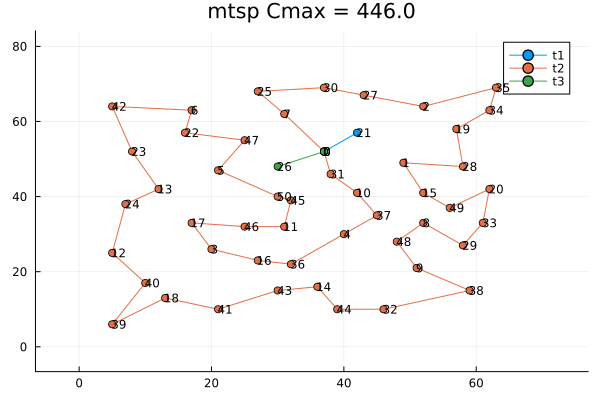

In [52]:
Draw_Solution(best_chrm, Float64.(depot), copy(transpose(customers)), "mtsp", best_chrm.fitness)

Tour 1:
87 78 12 33 80 37 65 7 51 45 22 41 21 57 28 35 66 74 6 73 60 75 79 71 56 
30 77 98 44 32 67 13 64 85 95 15 62 53 90 76 42 63 84 58 2 82 39 5 17 81 
24 19 8 9 20 46 11 27 55 94 25 86 54 91 47 1 99 29 34 50 18 36 61 4 52 
59 43 92 3 70 38 72 14 68 83 40 23 26 31 96 97 48 69 88 10 89 16 93 49 
cost=22346.423646874962


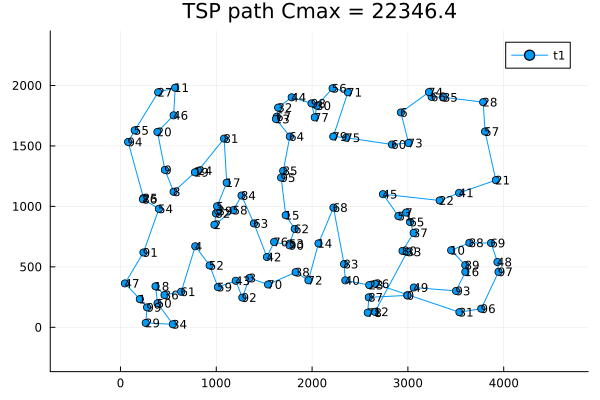

In [44]:
b = best_chrm.genes
tours = [Tour(b, find_tour_length(b, T))]
c = Chromosome(b, 0.0, 0.0, tours)
Draw_Solution(c, Float64.(depot), copy(transpose(customers)), "TSP path", find_tour_length(b, T))

In [12]:
T = Read_TSPLIB_instance(:eil51, 1)
n = size(T)[1]-2

50

Tour 1:
7 25 30 27 2 35 34 19 28 20 33 29 38 32 44 41 43 14 9 48 8 49 15 1 21 
cost=237.73330086132793
Tour 2:
26 5 47 22 6 42 23 13 24 12 39 18 40 17 3 16 36 46 11 45 50 4 37 10 31 
cost=236.44747980489342


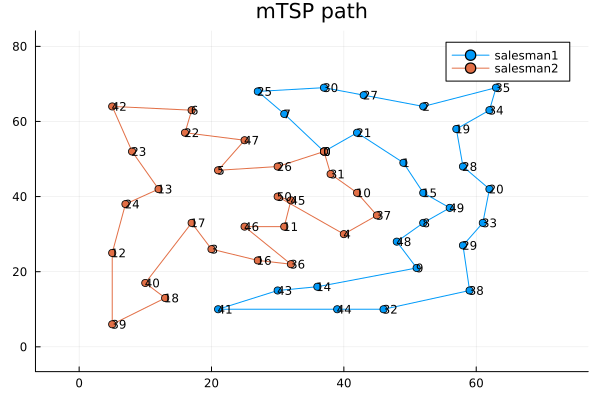

In [13]:
test_chrm = deepcopy(worst_chrm)
tsp = readTSPLIB(:eil51)
allNodes = tsp.nodes
num_of_nodes = size(allNodes)[1] - 1
depot = allNodes[1, :]

Customers = allNodes[2:num_of_nodes+1, :]
Draw_Solution(worst_chrm, depot, Customers)

Tour 1:
31 10 37 4 9 38 32 44 14 36 16 43 41 18 39 40 12 24 13 17 3 46 11 45 50 
cost=224.43265711683136
Tour 2:
26 5 47 22 23 42 6 25 7 30 27 2 35 34 19 28 20 33 29 48 8 49 15 1 21 
cost=224.82209632389166


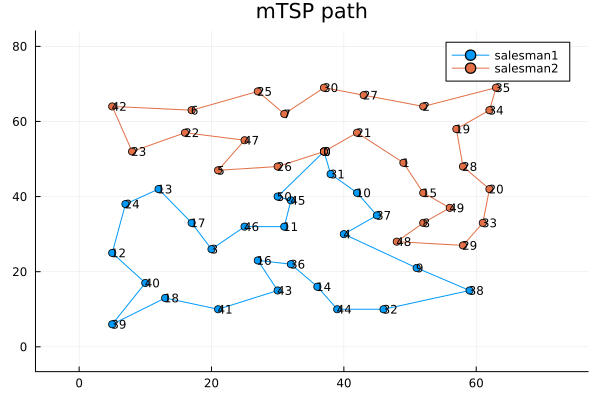

In [14]:
Draw_Solution(best_chrm, depot, Customers)

In [15]:
include("cross_escape.jl")

N_cross_extensive (generic function with 1 method)

In [16]:
N_cross_extensive(test_chrm, T, n, 30)

Chromosome([7, 25, 30, 27, 2, 35, 34, 19, 28, 20  …  16, 36, 46, 11, 45, 50, 4, 37, 10, 31], 237.73330086132793, 193.1806879649415, Tour[Tour([7, 25, 30, 27, 2, 35, 34, 19, 28, 20  …  41, 43, 14, 9, 48, 8, 49, 15, 1, 21], 237.73330086132793), Tour([26, 5, 47, 22, 6, 42, 23, 13, 24, 12  …  16, 36, 46, 11, 45, 50, 4, 37, 10, 31], 236.44747980489342)])

In [46]:
tt1 = copy(t1)
tt2 = copy(t2)
alpha1 = copy(t1[k11:k12])
alpha2 = copy(t2[k21:k22])
deleteat!(tt1, [i for i=k11:k12])

for i=1:k22-k21+1
    insert!(tt1, i+k11-1, alpha2[i])
end
deleteat!(tt2, [i for i=k21:k22])
for i=1:k12-k11+1
    insert!(tt2, i+k21-1, alpha1[i])
end

In [47]:
for i in t1
    print(i," ")
end

println()
for i in t2
    print(i," ")
end

println()
println([k11, k12, k21, k22])
for i in tt1
    print(i," ")
end
println()
for i in tt2
    print(i," ")
end


26 5 47 22 6 42 23 13 24 12 40 39 18 41 43 16 3 17 46 11 4 48 37 10 31 
50 45 36 14 44 32 38 9 29 33 20 49 8 15 1 28 19 34 35 2 27 30 25 7 21 
[14, 15, 22, 23]
26 5 47 22 6 42 23 13 24 12 40 39 18 30 25 16 3 17 46 11 4 48 37 10 31 
50 45 36 14 44 32 38 9 29 33 20 49 8 15 1 28 19 34 35 2 27 41 43 7 21 

In [48]:
find_tour_length(tt1, T)

317.79419039040624

In [49]:
find_tour_length(tt2, T)

324.3580804839092

In [50]:
println(Calculate_new_cost_cross_straight_straight(t1, c1, t2, c2, 14,15,22,23, T, length(worst_chrm.genes)))

(317.79419039040624, 304.8809710109339)


In [56]:
string(2.3)

"2.3"